<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Social Media Data Analysis - Final Project</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Analysis</h2>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Julia King</h4>
</div>
<br>

In [2]:
# import block

# own functions
from common_functions import confirm_execution, read_comment_df, read_video_df

# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# h1
from scipy.stats import chi2_contingency

# 7. Conduct statistical analysis to test the hypotheses above.

## 7.1 Videos produced before the first spike in public interest are more likely to be non-conspirative compared to those uploaded during and after the spike.

To test the hypothesis, i will need to test for statistical independence of two categorical variables: conspirative and phase. Thus, a Chi-Square test will be applied.

In [3]:
# load relevant data

video_df = read_video_df()

In [18]:
# create contingency table

consp_contingency = pd.crosstab(pd.Categorical(video_df["phase"]), pd.Categorical(video_df["conspirative_auto"]), margins = False)
consp_contingency.index.names = ["phase"]
consp_contingency

col_0,False,True
phase,,
0,182,88
1,311,880
2,184,370
3,440,488


In [50]:
consp_percent = consp_contingency.div(consp_contingency.sum(axis = 1), axis = 0)

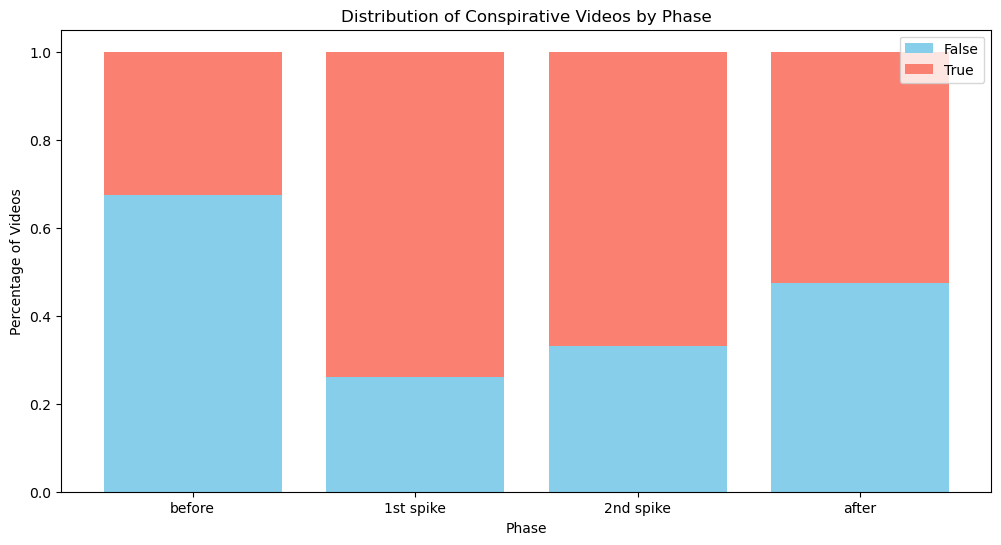

In [61]:
# plot share of conspirative videos per phase
consp_phases = ["before", "1st spike", "2nd spike", "after"]

plt.figure(figsize = (12, 6))
plt.bar(consp_phases, consp_percent[False], label = "False", color = "skyblue")
plt.bar(consp_phases, consp_percent[True], bottom = consp_percent[False], label = "True", color = "salmon")

# Labels and title
plt.xlabel("Phase")
plt.ylabel("Percentage of Videos")
plt.title("Distribution of Conspirative Videos by Phase")
plt.legend()

# Show plot
plt.show()

In [65]:
chi2, p, dof, expected = chi2_contingency(consp_contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Expected distributions under h0: \n", expected)

Chi-square statistic: 210.93240934076437
p-value: 1.8309036247353845e-45
Expected distributions under h0: 
 [[102.47706422 167.52293578]
 [452.03771662 738.96228338]
 [210.26775399 343.73224601]
 [352.21746517 575.78253483]]


We can already observe that it is extremely unlikely that all 4 phases belong to the same distribution. Thus, it is 

In [67]:
consp_contingency - pd.DataFrame(expected)

col_0,False,True
phase,,
0,79.522936,-79.522936
1,-141.037717,141.037717
2,-26.267754,26.267754
3,87.782535,-87.782535


## 7.2. Comments under conspirative videos express higher levels of negative sentiment compared to comments under non-conspirative videos.

## 7.3. The engagement metrics (e.g., likes, comments, shares per view) of conspirative videos differ significantly from those of non-conspirative videos, with conspirative videos having higher engagement rates per view.